In [2]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
M=nx.read_gml("polblogs.gml", relabel=True)


In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

###1. Create a nice looking graph of the political blog network

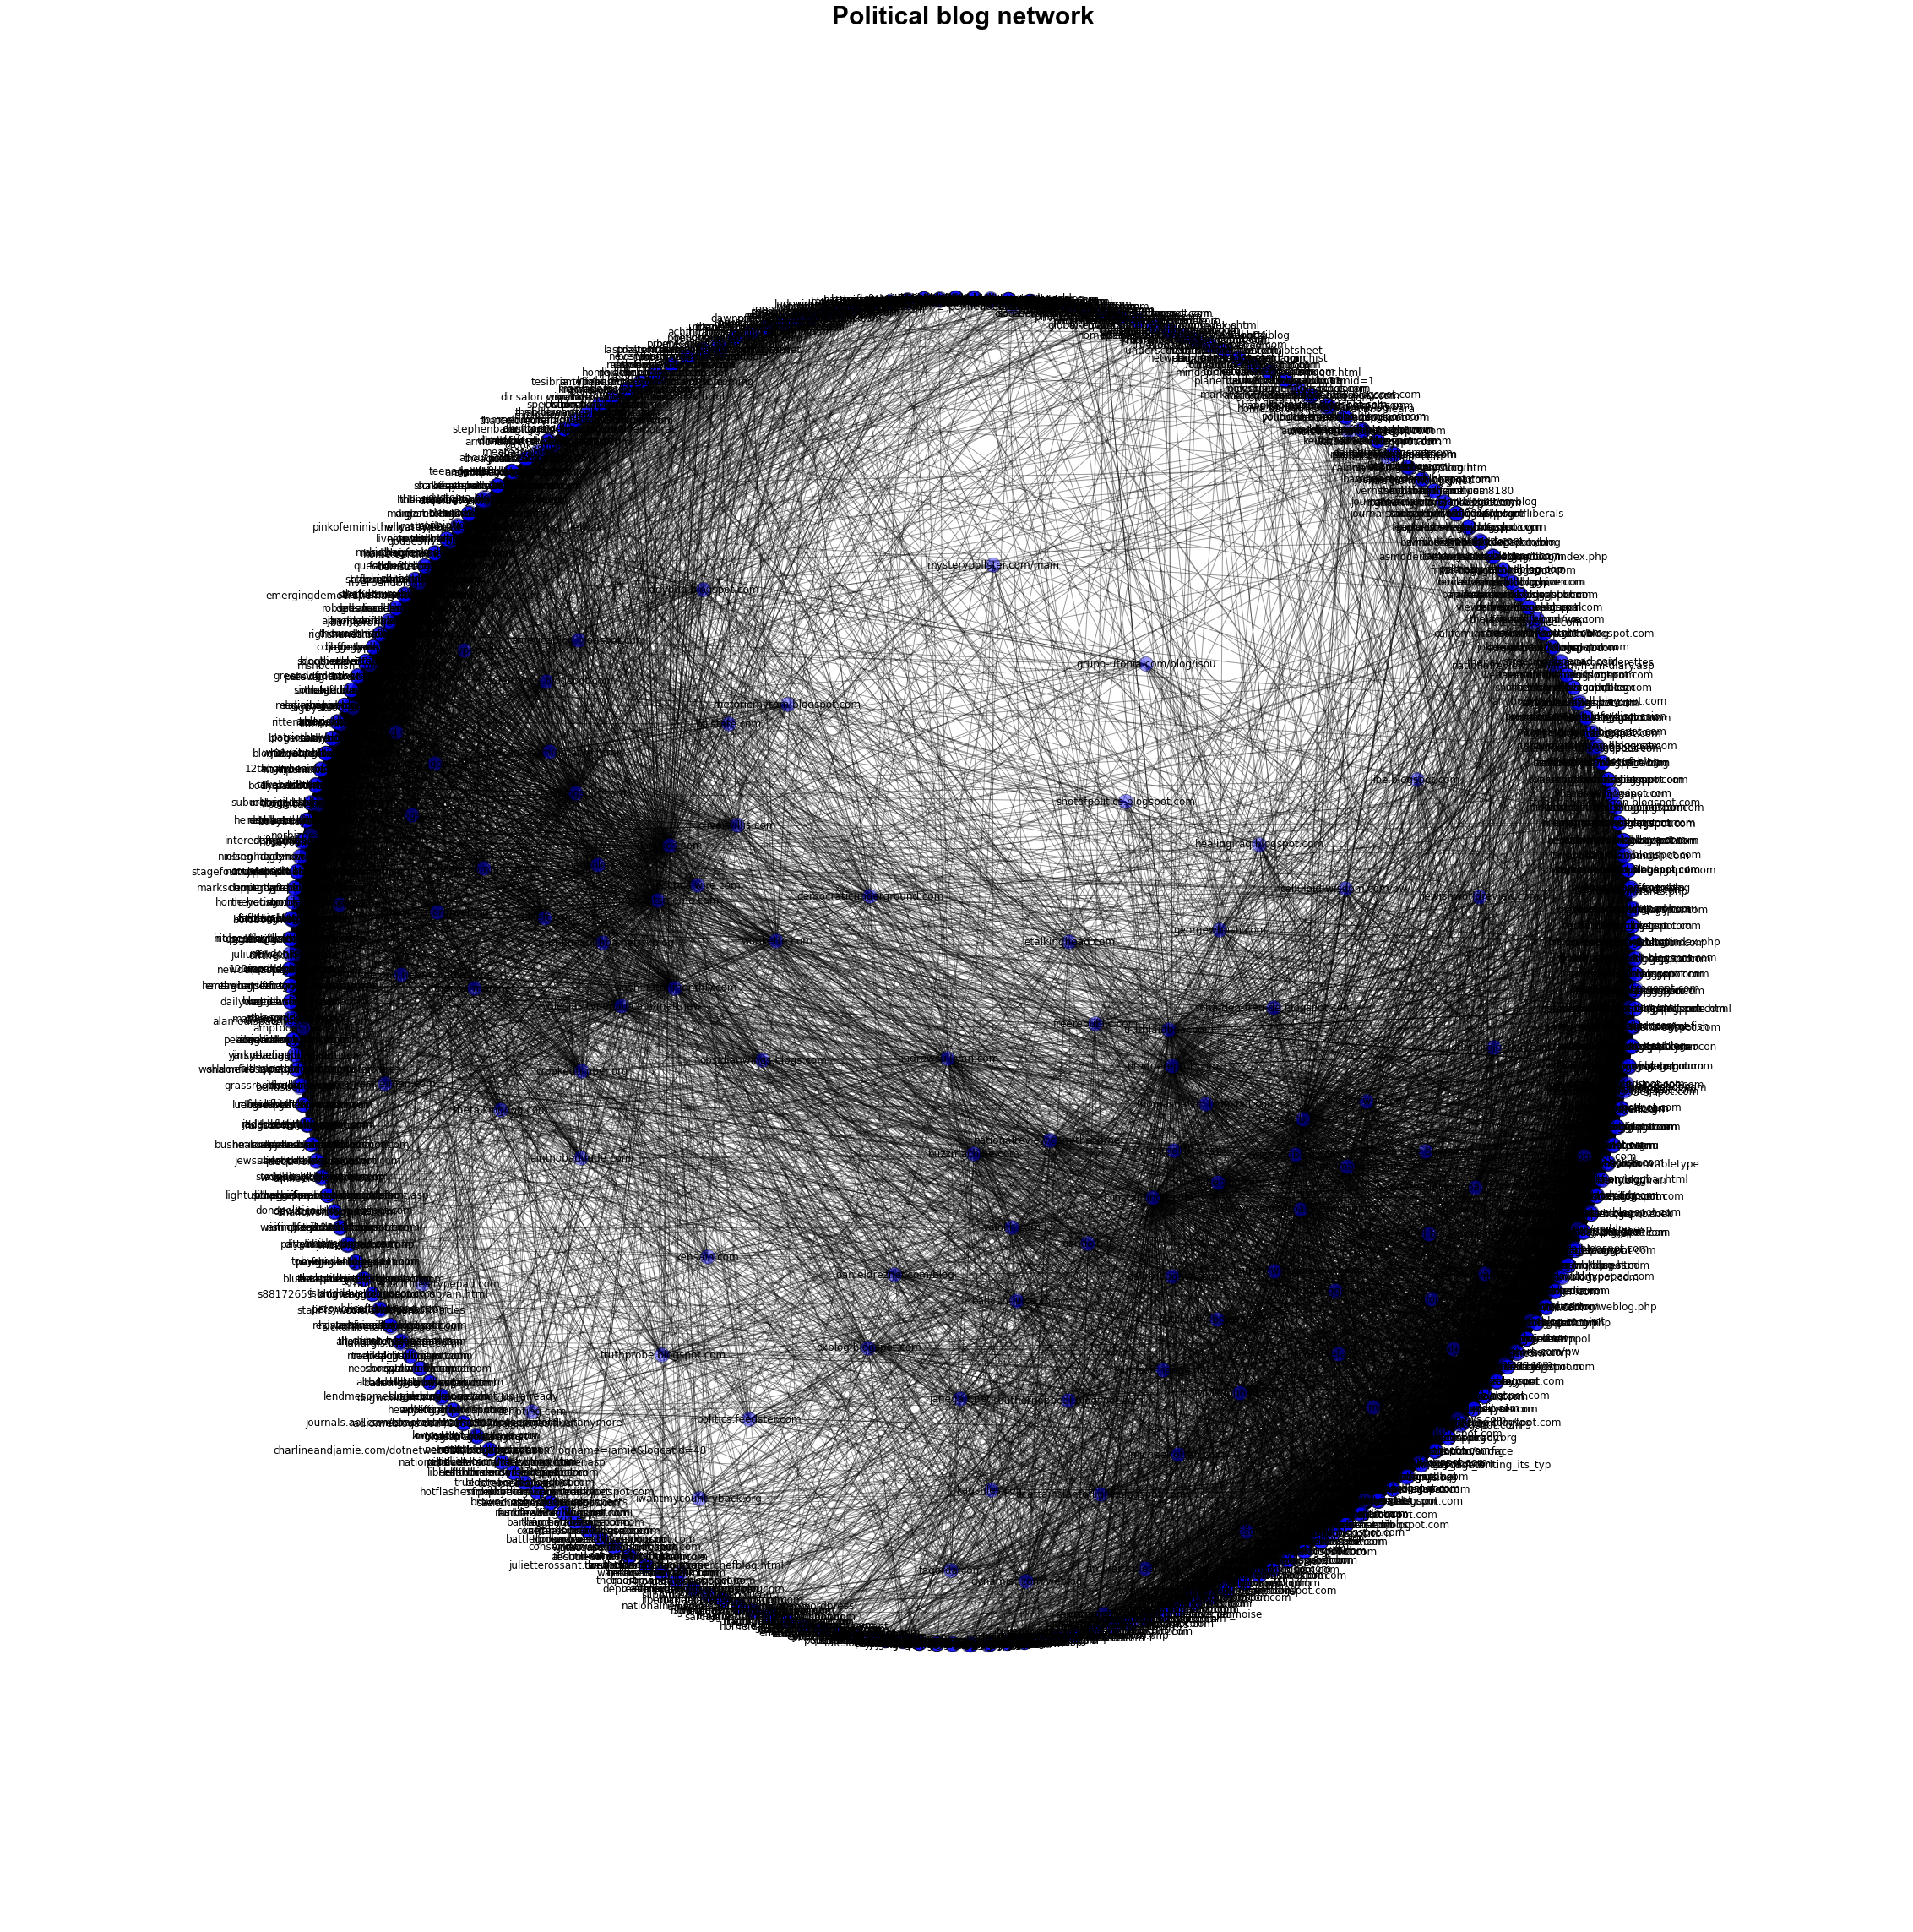

In [5]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Arial',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

###2. What are the 10 most influential blogs?

In [6]:
centrality= nx.eigenvector_centrality_numpy(G)


In [7]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [8]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "The 10 most influential blogs are:"
sorted_list_desc[0:10]

The 10 most influential blogs are:


[(u'atrios.blogspot.com', 0.19460836007497936),
 (u'dailykos.com', 0.16085880865133675),
 (u'washingtonmonthly.com', 0.14572953582904336),
 (u'digbysblog.blogspot.com', 0.14165745601016713),
 (u'bodyandsoul.typepad.com', 0.14001258615025966),
 (u'liberaloasis.com', 0.13870430871243805),
 (u'tbogg.blogspot.com', 0.13695090011935732),
 (u'corrente.blogspot.com', 0.12866467087664826),
 (u'talkingpointsmemo.com', 0.12715536738447386),
 (u'dneiwert.blogspot.com', 0.12147092830075573)]

###What are the 10 least influential blogs?

In [9]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "The 10 least influential blogs are:"
sorted_list_asc[0:10]

The 10 least influential blogs are:


[(u'digital-democrat.blogspot.com', -2.671224073902674e-19),
 (u'thelonedem.com', 2.188813345393623e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.438790791812117e-09),
 (u'quimundus.modblog.com', 6.704098662889504e-08),
 (u'batr.org/commentary.html', 6.766561471872845e-07),
 (u'batr.net', 6.767361565991294e-07),
 (u'democratvoice.org', 1.0406263430225611e-06),
 (u'quimundus.squarespace.com', 6.098983141249339e-06),
 (u'massachusetts-liberal.com', 9.360725065425264e-06),
 (u'thingsasitis.net', 1.1599475002590745e-05)]

###Left and Right Wing blocks

In [10]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

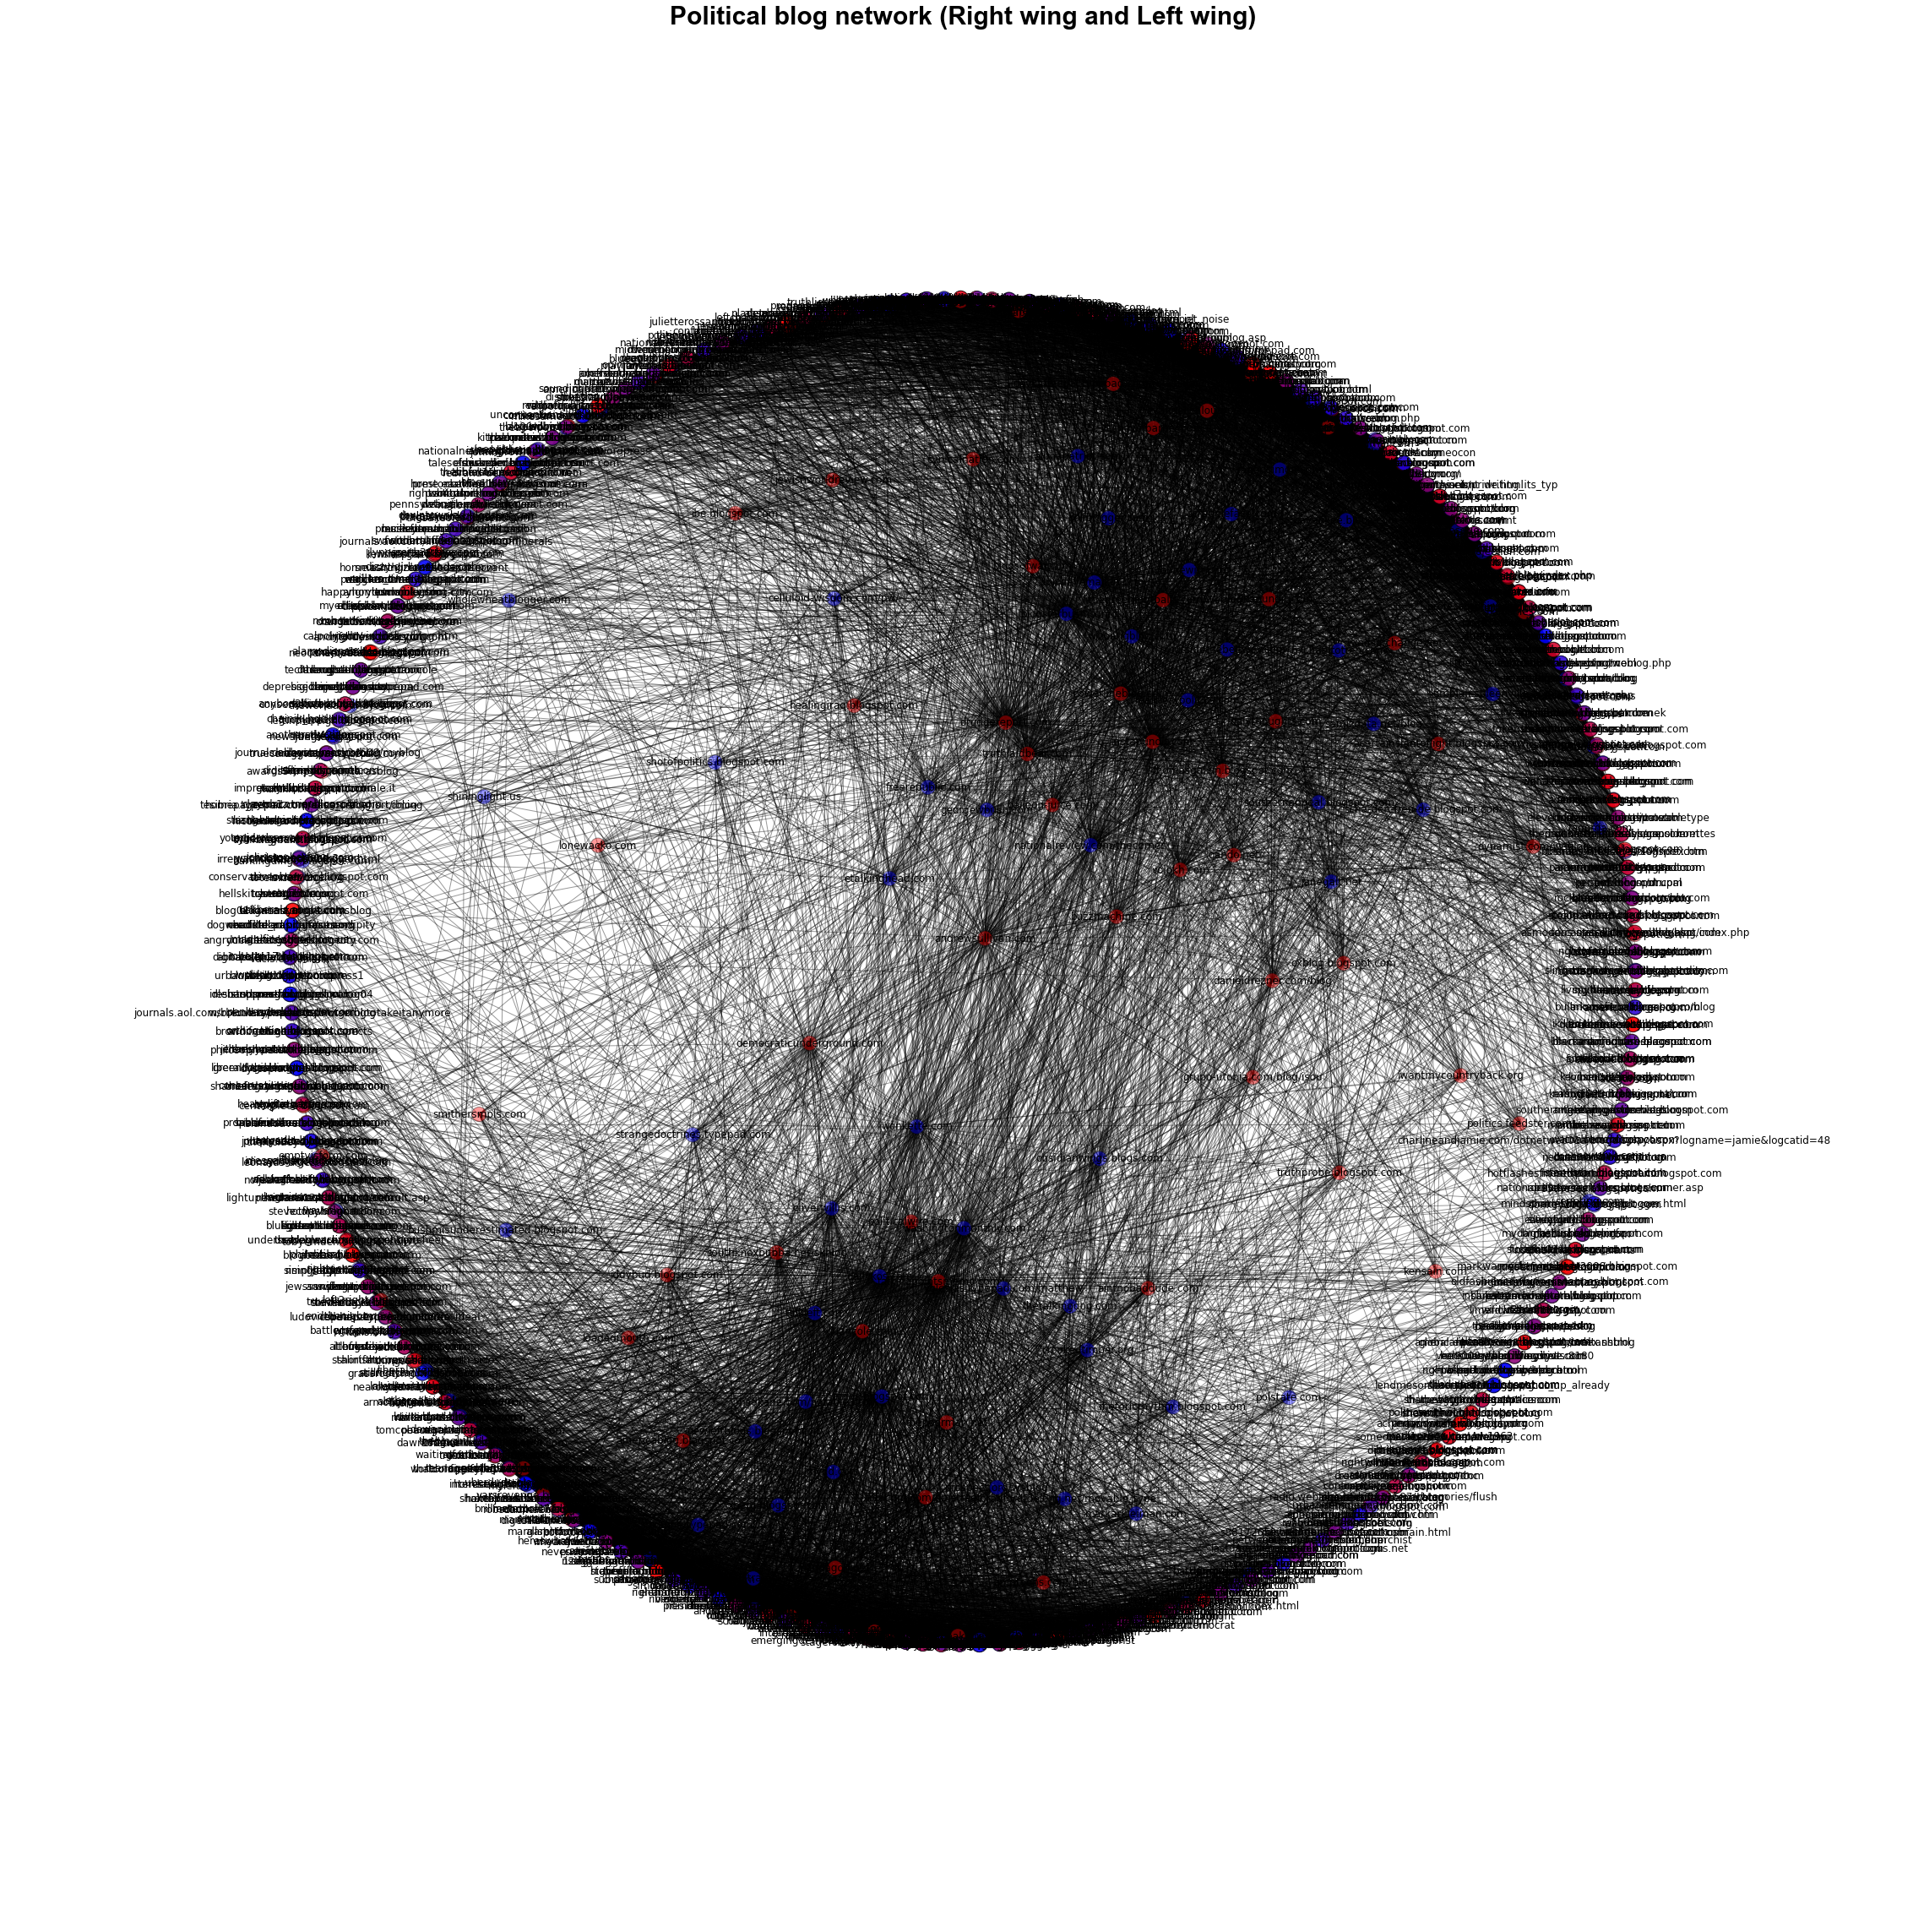

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Arial',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [20]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [21]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [23]:
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [24]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

###Top 10 most influential left wing blocks

In [25]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The ten most influential left wing blogs are:"
sorted_list_desc_L[0:10]

The ten most influential left wing blogs are:


[(u'atrios.blogspot.com', 0.21014471148743785),
 (u'dailykos.com', 0.1688874980227019),
 (u'bodyandsoul.typepad.com', 0.1562058138446822),
 (u'liberaloasis.com', 0.15586157478431176),
 (u'digbysblog.blogspot.com', 0.1549179980287001),
 (u'tbogg.blogspot.com', 0.15057628736016979),
 (u'corrente.blogspot.com', 0.14461524166958667),
 (u'washingtonmonthly.com', 0.13912545257202882),
 (u'dneiwert.blogspot.com', 0.13430191643368583),
 (u'pandagon.net', 0.13254155028960105)]

###Top 10 least influential left wing blocks

In [26]:
print "The ten least influential left wing blogs are:"
sorted_list_asc_L[0:10]

The ten least influential left wing blogs are:


[(u'hellofromparis.blogspot.com', -4.572233785749255e-18),
 (u'tomdaschle.com/tom/index.php?id=34', -3.942437093098197e-18),
 (u'stonyfield.com/weblog/strongwomendailynews/index.html',
  -3.81090569635949e-18),
 (u'babylon.squarespace.com', -3.7707325156161016e-18),
 (u'votekerryedwards2004.blogspot.com', -3.759779677909737e-18),
 (u'nuntius.blogspot.com', -3.5996349344210296e-18),
 (u'estropundit.blogspot.com', -3.486315390907256e-18),
 (u'tallone.org', -3.4516983252789208e-18),
 (u'jcchurch.blogspot.com', -3.449771107345504e-18),
 (u'democrants.blogspot.com', -3.3386027124623068e-18)]

###Top 10 most influential right wing blocks

In [27]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The ten most influential right wing blogs are:"
sorted_list_desc_R[0:10]

The ten most influential right wing blogs are:


[(u'instapundit.com', 0.21130462294596933),
 (u'blogsforbush.com', 0.20259499592591648),
 (u'hughhewitt.com', 0.16819176553481552),
 (u'lashawnbarber.com', 0.15892783854937362),
 (u'michellemalkin.com', 0.14770452828583142),
 (u'wizbangblog.com', 0.14672175943553026),
 (u'powerlineblog.com', 0.14614009491871843),
 (u'vodkapundit.com', 0.13718343720517892),
 (u'littlegreenfootballs.com/weblog', 0.13699993217225234),
 (u'outsidethebeltway.com', 0.1231695595420663)]

###Top 10 least influential right wing blocks

In [19]:
print "The ten least influential right wing blogs are:"
sorted_list_asc_R[0:10]

The ten least influential right wing blogs are:


[(u'getdexview.barrennorth.com', -9.600796877681896e-18),
 (u'flyinspacemonkey.mu.nu', -9.443460926482738e-18),
 (u'speculativepolitics.blogspot.com', -9.027110788299642e-18),
 (u'louisville.edu/~bebusc02/blog/notarobot.html', -8.518518995264458e-18),
 (u'larsonreport.com', -8.301991839121645e-18),
 (u'skinmeister.name', -8.145678181727264e-18),
 (u'inmyrightmind.com', -8.140640854692949e-18),
 (u'airjun.blogspot.com', -8.075362711522505e-18),
 (u'michaelsavagelistener.blog-city.com', -7.862845175542905e-18),
 (u'georgewbush.com/blog', -7.59575502754819e-18)]